# Compute percentiles on the trends for both regional and spatial processed data

### Imports

In [1]:
import glob
import os
import numpy as np
import xarray as xr

### Load and process regional trend data

#### Models

### Compute trend percentiles (regional)

#### Observations

In [2]:
gistemp_5x5_70_dir = 'GISTEMP_5x5/20240820/xagg_correctedtime/threshold_0.70/'
gistemp_5x5_95_dir = 'GISTEMP_5x5/20240820/xagg_correctedtime/threshold_0.95/'

In [3]:
gistemp_tas_var = 'tas'

In [4]:
obs_tseries_dir = "/glade/work/jonahshaw/trend_uncertainty/nathan/OBS_LENS/"
gistemp_5x5_trends_70_filepath = glob.glob('%s/%s/*.trends.movingstartdate.IPCCRegions.190001-202012*.nc' % (obs_tseries_dir, gistemp_5x5_70_dir))
gistemp_5x5_trends_95_filepath = glob.glob('%s/%s/*.trends.movingstartdate.IPCCRegions.190001-202012*.nc' % (obs_tseries_dir, gistemp_5x5_95_dir))

Load the trend data

In [5]:
gistemp_5x5_trends_70_all  = xr.open_dataarray(*gistemp_5x5_trends_70_filepath)
gistemp_5x5_trends_95_all  = xr.open_dataarray(*gistemp_5x5_trends_95_filepath)

In [6]:
gistemp_5x5_trends_70_1900 = gistemp_5x5_trends_70_all.sel(startyear=1)
gistemp_5x5_trends_95_1900 = gistemp_5x5_trends_95_all.sel(startyear=1)

In [7]:
import matplotlib.pyplot as plt

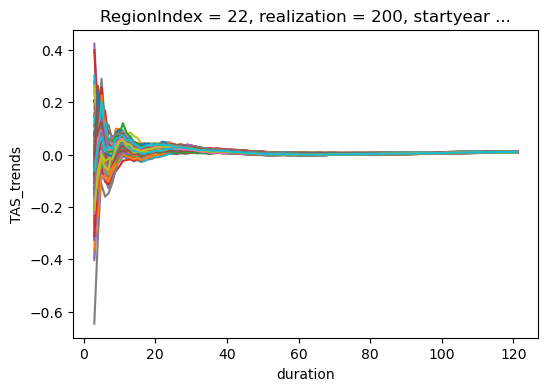

In [8]:
fig, ax = plt.subplots(1,1, figsize=(6,4))

data = gistemp_5x5_trends_70_1900.sel(RegionIndex=22)

for i in data.realization:
    _realization = data.sel(realization=i)
    _realization.plot(ax=ax)


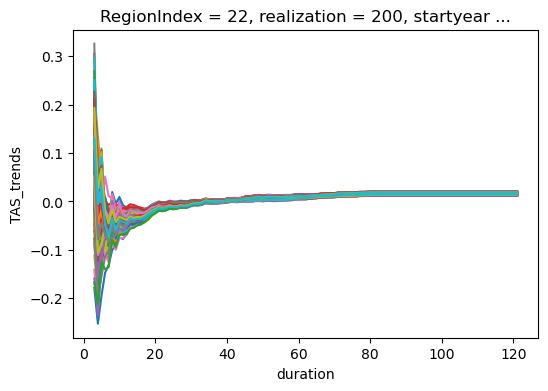

In [9]:
fig, ax = plt.subplots(1,1, figsize=(6,4))

data = gistemp_5x5_trends_95_1900.sel(RegionIndex=22)

for i in data.realization:
    _realization = data.sel(realization=i)
    _realization.plot(ax=ax)


In [12]:
qlist = [0.025, 0.5, 0.975]
gistemp_5x5_trends_70_percentiles  = gistemp_5x5_trends_70_1900.quantile(q=qlist, dim='realization').rename({"quantile": "percentile"})

filename = 'ensembleChunks_0001_0200.trends.movingstartdate.Percentiles.IPCCRegions.190001-202012.nc'

gistemp_5x5_trends_70_percentiles.to_netcdf('%s/%s/%s' % (obs_tseries_dir, gistemp_5x5_70_dir, filename))

/glade/work/jonahshaw/conda-envs/py_xagg/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1634: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


In [13]:
qlist = [0.025, 0.5, 0.975]
gistemp_5x5_trends_95_percentiles  = gistemp_5x5_trends_95_1900.quantile(q=qlist, dim='realization').rename({"quantile": "percentile"})

filename = 'ensembleChunks_0001_0200.trends.movingstartdate.Percentiles.IPCCRegions.190001-202012.nc'

gistemp_5x5_trends_95_percentiles.to_netcdf('%s/%s/%s' % (obs_tseries_dir, gistemp_5x5_95_dir, filename))